In [ ]:
#import thu vien
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [ ]:
from math import inf
def load_data(file_name,train_size = 0.8,test_size = 0.2, random_state = 0):
  user_iter = pathlib.Path(file_name).iterdir()
  input_data = list()
  label_data = list()
  global label_output
  label_output = list()
  for label,folder in enumerate(user_iter,0):
    label_output.append(str(folder).split('/')[-1])
    for img in pathlib.Path(folder).iterdir():
      input_data.append(img_to_array(load_img(img,target_size=(150,150))))
      label_data.append(label)
  input_dataset = np.array(input_data)
  label_dataset = np.array(label_data)
  global x_train, x_test, y_train, y_test
  x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size= train_size, test_size= test_size, random_state= random_state)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test/= 255
  y_train = to_categorical(y_train,(max(label_data)+1))
  y_test = to_categorical(y_test,(max(label_data)+1))
  print('Input x',input_dataset.shape)
  print('Output Y ',label_dataset.shape)
  print('x_train: ',x_train.shape)
  print('x_test: ',x_test.shape)
  print('y_train: ',y_train.shape)
  print('y_test: ',y_test.shape)
  print('Label: ',label_output)
def Evaluate(file_name,model,*obj,limit = inf,download = 0,limit_download = 5):
  if download == 0:
    for folder in pathlib.Path(file_name).iterdir():
      for i,image in enumerate(pathlib.Path(folder).iterdir(),1):
        img = load_img(image,target_size=(150,150))
        plt.imshow(img)
        plt.show()
        img = img_to_array(img)
        img = img.reshape(1,150,150,3)
        print(label_output[np.argmax(model.predict(img),axis = 1)[0]])
        if i == limit: break
  else:
    obj = tuple(obj)
    for keyword in obj:
      downloader.download(keyword,limit = limit_download, output_dir = file_name)
      for image in pathlib.Path(str(file_name+'/'+keyword)).iterdir():
        img = load_img(image,target_size=(150,150))
        plt.imshow(img)
        plt.show()
        img = img_to_array(img)
        img = img.reshape(1,150,150,3)
        print(label_output[np.argmax(model.predict(img),axis = 1)[0]])

In [ ]:
file = '/content/drive/MyDrive/money/train'
load_data(file)

Input x (131, 150, 150, 3)
Output Y  (131,)
x_train:  (104, 150, 150, 3)
x_test:  (27, 150, 150, 3)
y_train:  (104, 10)
y_test:  (27, 10)
Label:  ['10.000DONG', '500DONG', '2000DONG', '500.000DONG', '100.000DONG', '50.000DONG', '1000DONG', '200.000DONG', '5000DONG', '20.000DONG']


In [ ]:
x_test.shape

(27, 150, 150, 3)

In [ ]:
model=Sequential()
#model CNN
# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 3
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))
opt = SGD(lr = 0.01,momentum = 0.9)
model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=300,batch_size = 64,validation_data=(x_test,y_test), verbose=1)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 263ms/step - loss: 2.5910 - accuracy: 0.1250 - val_loss: 2.2375 - val_accuracy: 0.1852
Epoch 2/300
2/2 [==============================] - 0s 111ms/step - loss: 2.3078 - accuracy: 0.1346 - val_loss: 2.2741 - val_accuracy: 0.2593
Epoch 3/300
2/2 [==============================] - 0s 107ms/step - loss: 2.3064 - accuracy: 0.0962 - val_loss: 2.2577 - val_accuracy: 0.1481
Epoch 4/300
2/2 [==============================] - 0s 109ms/step - loss: 2.2808 - accuracy: 0.1442 - val_loss: 2.3242 - val_accuracy: 0.0370
Epoch 5/300
2/2 [==============================] - 0s 109ms/step - loss: 2.2775 - accuracy: 0.0865 - val_loss: 2.3327 - val_accuracy: 0.1111
Epoch 6/300
2/2 [==============================] - 0s 122ms/step - loss: 2.2558 - accuracy: 0.1731 - val_loss: 2.3018 - val_accuracy: 0.2222
Epoch 7/300
2/2 [==============================] - 0s 108ms/step - loss: 2.2376 - accuracy: 0.1827 - val_loss: 2.3247 - val_accuracy: 0.0741
Epoch 8/300
2/2 [========

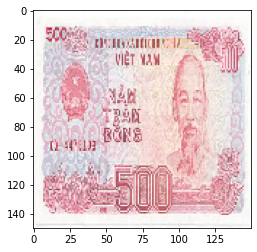

500DONG


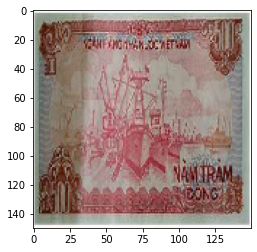

500DONG


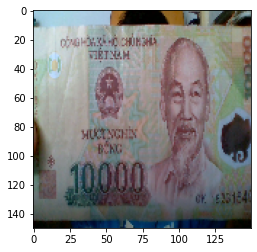

500.000DONG


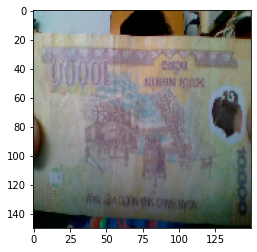

500.000DONG


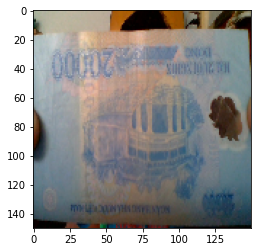

2000DONG


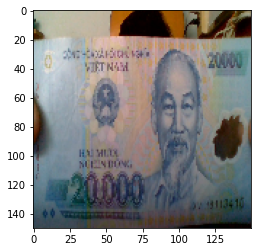

500.000DONG


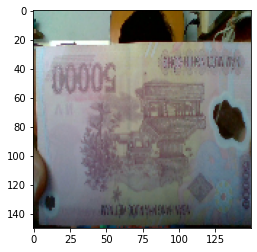

2000DONG


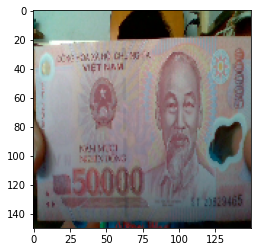

2000DONG


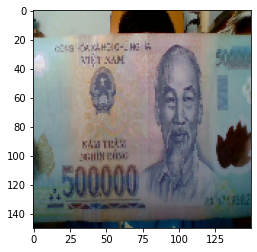

500.000DONG


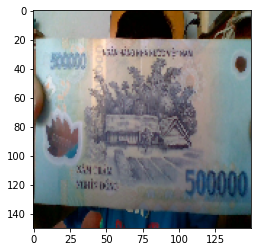

500.000DONG


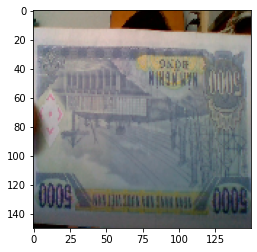

500.000DONG


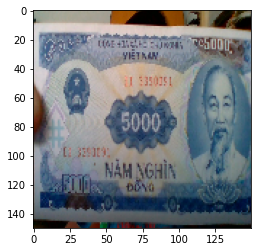

5000DONG


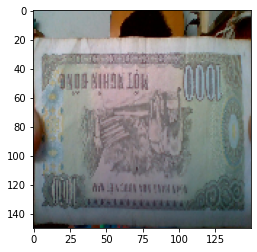

2000DONG


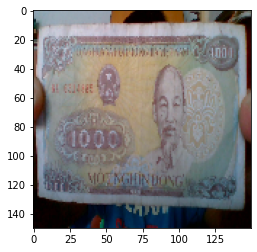

500.000DONG


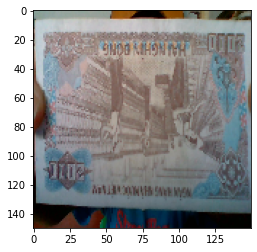

500.000DONG


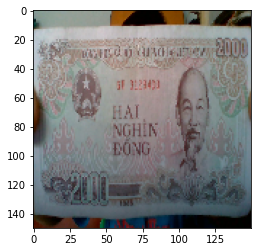

500.000DONG


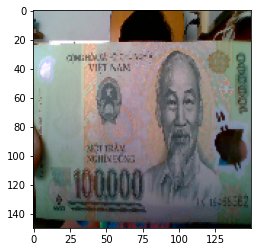

500.000DONG


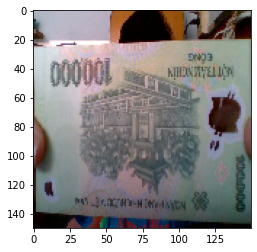

2000DONG


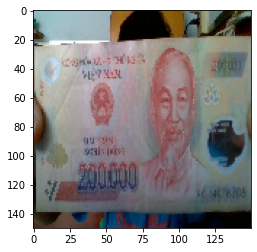

2000DONG


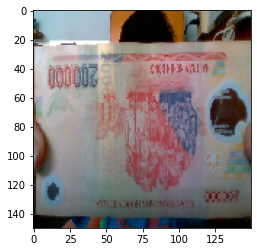

2000DONG


In [ ]:
name = 'drive/MyDrive/money/test'
#obj=['','banana','mango']
Evaluate(name,model,download=0)